## Import Libraries

In [493]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [494]:
df = pd.read_csv("final_data_cleaned.csv")

In [495]:
df.shape

(6397, 19)

In [496]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,8,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,10,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [497]:
# uniqeness
df[df.duplicated()]

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [498]:
# Completeness
df.isnull().sum()

Unnamed: 0             0
team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [499]:
# Accurecy types
df.dtypes

Unnamed: 0               int64
team                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                  float64
current_value          float64
highest_value          float64
dtype: object

In [500]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
# numerical_feats_2 = ['height', 'age', 'appearance', 'goals', 'assists',
#        'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
#        'clean sheets', 'minutes played', 'days_injured', 'games_injured',
#        'award', 'current_value', 'highest_value']

# cetegorical_feats_2 = ['team', 'position']

cetegorical_feats = df.select_dtypes(include='object').columns.to_list()

In [501]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Cardiff City         26
Portimonense SC      26
Watford FC           26
                     ..
Bayern Munich         2
Gaziantep FK          2
Manchester City       2
FC Barcelona          2
Real Madrid           1
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          667
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Defender                         1
Attack                           1
Name: count, dtype: int64


In [502]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [503]:
# Calculate the frequency of each 'Type'
type_counts = df['position'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['position'].isin(type_counts[type_counts >= 2].index)]

In [504]:
# looping through the categorical columns and counting them
# if a category is only 1, we will treat it as an outlier
for i in cetegorical_feats:
    print(df[i].value_counts())

team
Huddersfield Town    29
Orlando Pirates      27
Watford FC           26
Blackpool FC         26
Portimonense SC      26
                     ..
Arsenal FC            4
Gaziantep FK          2
Bayern Munich         2
Manchester City       2
FC Barcelona          2
Name: count, Length: 373, dtype: int64
position
Defender Centre-Back          1247
midfield-CentralMidfield       767
Attack Centre-Forward          666
midfield-DefensiveMidfield     616
Defender Right-Back            582
Defender Left-Back             566
Attack-RightWinger             469
midfield-AttackingMidfield     466
Attack-LeftWinger              427
Goalkeeper                     423
midfield-LeftMidfield           65
midfield-RightMidfield          61
Attack-SecondStriker            36
midfield                         3
Name: count, dtype: int64


In [505]:
df.columns

Index(['Unnamed: 0', 'team', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [506]:
# removing the unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

In [507]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [508]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,0.0,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
1,Manchester United,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132.0,182.0,15.0,3.0,22000000.0,22000000.0


In [509]:
cetegorical_feats

['team', 'position']

In [510]:
df.shape

(6394, 18)

In [511]:
# one hot coding
df = pd.get_dummies(df, columns=['team'])

In [512]:
df.shape

(6394, 390)

In [513]:
df.head(2)

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
0,Defender Centre-Back,186.0,21.0,34.0,0.000000,0.000000,0.130529,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,Defender Left-Back,169.0,23.0,89.0,0.012619,0.063096,0.227145,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [514]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['age'].quantile(0.35)
p75 = df['age'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Lower Age Group'
    elif price < p75:
        return 'Middle Age Group'
    else:
        return 'Upper Age Group'

# Apply the function to create a new column
df['age_category'] = df['age'].apply(categorize_price)

df.drop('age', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['age_category'].value_counts())

age_category
Middle Age Group    2571
Lower Age Group     2095
Upper Age Group     1728
Name: count, dtype: int64


In [516]:
encoder = LabelEncoder()
df['age_category_encoded'] = encoder.fit_transform(df['age_category'])  

#### 3. Feature selection

In [517]:
correlation = df.corr(numeric_only=True)

In [518]:
print(correlation['age_category_encoded'].sort_values(ascending=False))

age_category_encoded                   1.000000
games_injured                          0.247303
award                                  0.246066
days_injured                           0.223513
minutes played                         0.106345
                                         ...   
team_Clube de Regatas Vasco da Gama   -0.041865
team_FC Volendam                      -0.041981
assists                               -0.043452
team_Red Bull Salzburg                -0.050892
current_value                         -0.115820
Name: age_category_encoded, Length: 389, dtype: float64


In [520]:
# Set the correlation threshold
threshold = 0.03  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['age_category_encoded']) > threshold]['age_category_encoded'].index
selected_features

Index(['height', 'appearance', 'goals', 'assists', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'team_AZ Alkmaar',
       'team_Ajax Amsterdam', 'team_Al-Adalah FC', 'team_Al-Fateh SC',
       'team_Al-Fayha FC', 'team_Al-Khaleej', 'team_Avispa Fukuoka',
       'team_Burnley FC', 'team_CA Central Córdoba (SdE)', 'team_CF Pachuca',
       'team_Chelsea FC', 'team_Clube de Regatas Vasco da Gama',
       'team_Cádiz CF', 'team_Eintracht Frankfurt', 'team_FC Empoli',
       'team_FC Groningen', 'team_FC Volendam', 'team_Incheon United',
       'team_Jeju United', 'team_Liverpool FC', 'team_New York City FC',
       'team_OGC Nice', 'team_Orlando Pirates', 'team_Pohang Steelers',
       'team_Puebla FC', 'team_Querétaro FC', 'team_Red Bull Salzburg',
       'team_SK Sturm Graz', 'team_Sekhukhune United FC', 'team_Sivasspor',
       'team_Sporting CP', 'team_Sunderland AFC', 'team_Suwon FC',
    

In [523]:
df = df[selected_features]
df.head()

,height,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,...,team_Sporting CP,team_Sunderland AFC,team_Suwon FC,team_Suwon Samsung Bluewings,team_Ulsan Hyundai,team_Vissel Kobe,team_Vitória Guimarães SC,team_Western United FC,team_Wolfsberger AC,age_category_encoded
0,186.0,34.0,0.000000,0.000000,0.0,0.0,2758.0,47.0,13.0,0.0,...,False,False,False,False,False,False,False,False,False,0
1,169.0,89.0,0.012619,0.063096,0.0,0.0,7132.0,182.0,15.0,3.0,...,False,False,False,False,False,False,False,False,False,0
2,180.0,34.0,0.000000,0.033507,0.0,0.0,2686.0,175.0,28.0,1.0,...,False,False,False,False,False,False,False,False,False,0
3,183.0,72.0,0.032293,0.048439,0.0,0.0,5574.0,328.0,49.0,3.0,...,False,False,False,False,False,False,False,False,False,1
4,183.0,60.0,0.000000,0.018817,0.0,0.0,4783.0,126.0,20.0,1.0,...,False,False,False,False,False,False,False,False,False,1


In [524]:
df.columns

Index(['height', 'appearance', 'goals', 'assists', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'team_AZ Alkmaar',
       'team_Ajax Amsterdam', 'team_Al-Adalah FC', 'team_Al-Fateh SC',
       'team_Al-Fayha FC', 'team_Al-Khaleej', 'team_Avispa Fukuoka',
       'team_Burnley FC', 'team_CA Central Córdoba (SdE)', 'team_CF Pachuca',
       'team_Chelsea FC', 'team_Clube de Regatas Vasco da Gama',
       'team_Cádiz CF', 'team_Eintracht Frankfurt', 'team_FC Empoli',
       'team_FC Groningen', 'team_FC Volendam', 'team_Incheon United',
       'team_Jeju United', 'team_Liverpool FC', 'team_New York City FC',
       'team_OGC Nice', 'team_Orlando Pirates', 'team_Pohang Steelers',
       'team_Puebla FC', 'team_Querétaro FC', 'team_Red Bull Salzburg',
       'team_SK Sturm Graz', 'team_Sekhukhune United FC', 'team_Sivasspor',
       'team_Sporting CP', 'team_Sunderland AFC', 'team_Suwon FC',
    

#### 4. Prepare train and test data

In [525]:
# Prepare data
X = df.drop(['age_category_encoded'], axis=1)
y = df['age_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [526]:
X.shape

(6394, 51)

## Buliding the Model

In [527]:
# creating Linear Regression model
model = LogisticRegression()

## Train the Model

In [528]:
# Fit the Linear Regression model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [529]:
# Predict and evaluate the Linear Regression model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [530]:
model.coef_

array([[ 3.32575586e-02,  7.39672762e-01, -6.57927543e-02,
         2.34987331e-02, -4.88053437e-03, -4.75904930e-02,
        -1.02796168e+00,  4.38730436e-03, -3.11526129e-01,
        -3.22285374e-01,  1.47681867e+00, -1.24725543e+00,
         6.47308820e-02,  1.12744682e-01, -1.21679315e-01,
        -3.41823324e-02, -1.84638431e-01, -1.30637910e-01,
        -8.56027069e-02,  6.30963934e-02, -7.65081953e-02,
         5.66542078e-02,  9.32558036e-02,  4.08075952e-02,
        -2.72121026e-02,  8.80151877e-02,  8.27255630e-02,
         3.78066460e-02,  6.89254981e-02, -5.92565992e-02,
        -2.91420288e-02,  9.97872374e-02,  4.29770198e-02,
         4.26113171e-02, -7.78410846e-02, -4.27740403e-02,
        -6.16142036e-02, -2.46652659e-02,  1.62956814e-01,
         8.38115236e-02, -2.61593974e-01, -1.80055806e-01,
         5.96580099e-02,  8.34599792e-02, -2.07277858e-01,
        -7.34547882e-03, -1.70553865e-01, -8.65510356e-02,
         4.81978065e-02, -4.58064232e-02,  8.02791150e-0

In [531]:
# putting the coefficients of the Linear Regression model in a dataframe to view it
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,-0.014577
appearance,-0.773250
goals,0.037208
assists,-0.002948
goals conceded,0.019970
clean sheets,0.050239
minutes played,1.031832
days_injured,-0.078441
games_injured,0.350347
award,0.325406


In [532]:
print(model.intercept_) 

[-0.13800408  0.46869941 -0.33069532]


## Evaluating the Model 

In [533]:
# our benchmark model
base_model = round(df['age_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

40.21

1. Accuracy

In [534]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.565285379202502

In [535]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.544672531769306

In [536]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[256, 146,  18],
       [122, 296,  76],
       [ 37, 157, 171]], dtype=int64)

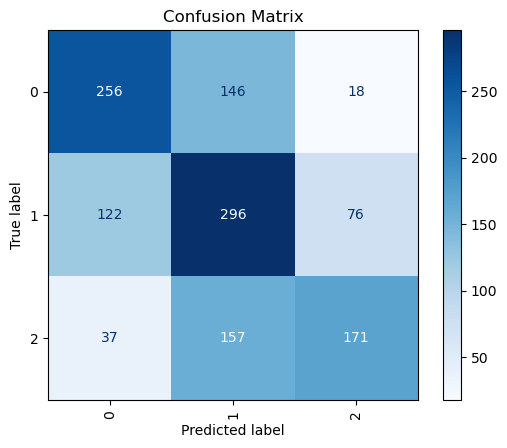

In [537]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [538]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.59


In [539]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.56


In [540]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.57
